# Koralasyon Analiz

kor.katsayısı  
 
                =1 mükemmel pozitif kor.
                =0.9 yüksek pozitif kor.
                =0.5 düşük pozitif kor
                =0 kor. yok
(-)li değerlerde de negatif kor dan bahsedilir           
                
                =-1 mükemmel negatif kor.
                =-0.9 yüksek negatif kor.
                =-0.5 düşük negatif kor.
mesela reklam harcmaları, satış miktarı arasında pozitif kor.

araç kilometresi, fiyatı arasında negatif kor. olması beklenir

biz burada koralaasyonun anlamlılığpını test edicez.

yani: Evet biz bir korolasyon bulduk ama bu koralasyon anlamlı mı onu kontrol edicez

H0: p=0 (koralasyon yoktur)

H1: p!=0 (anlamlı korolasyon vardır)

Varsayımlar
* iki değişkne içinde normallik
* Varsayım sağlanıyorsa **Peason** Koralasyon Katsayısı
* Varsayım sağlanmıyorsa **Spearman** Korelasyon katsayısı

## İş uygulaması

Ödenen ile ödenen bahşiş arasında korelasyon var mı?

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
data=sns.load_dataset("tips")
tip=data.copy()
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
#buraada biz bahşiş ve ödenen miktar arasında anlamlı ilişki olup olmadığına bakıcaz ancak 
#toplam ödenen miktarında içinde zaten bahşiişde dahil önce bunu düzeltelim
tip["total_bill"]=tip["total_bill"]-tip["tip"]

In [15]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='tip', ylabel='total_bill'>

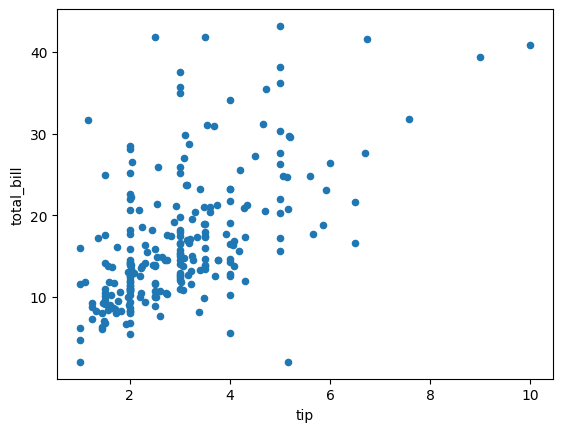

In [17]:
tip.plot.scatter(x="tip", y="total_bill")

Bu zman kadar zaten veriyi görselleştirip bu yukarıdaki koralasyonun olup omadığını kontrol ettik

Şimdi ise varsayımları kontrol edip bunun hipotez testini yapıcaz

#### Varsyım Kontrolü

In [18]:
#normallik
from scipy.stats import shapiro
print("istatistik : %.4f\np değeri : %.4f"%shapiro(tip["total_bill"]))
print("istatistik : %.4f\np değeri : %.4f"%shapiro(tip["tip"]))

istatistik : 0.9136
p değeri : 0.0000
istatistik : 0.8978
p değeri : 0.0000


In [19]:
## ops! h0(örnek dağilimi ile teorik normla dağilim arasında isttaiksel fark yoktur) red edildi 
# o zaman vardır yani normallik varsayıı sağlanamadı
# evet varsayımlar sağlanamadığında non-parametrik testimizi yaparız
#biz burada sağlam-nıi gibi yinde işlemleri yapıcaz mkasat ikş test şeklinide yapmış olalım

### Hipotez Testi


In [23]:
# koralasyon katsayisi
tip["tip"].corr(tip["total_bill"])# şu an normal koralasyo katsayısını elde ettik ancak jatırlarsın non-paremtrik durumda speaarman kullanılır

0.5766634471096378

In [22]:
tip["tip"].corr(tip["total_bill"], method="spearman")

0.593691939408997

In [24]:
# 0.60 civarı o zamn poziitf yönlü orta şiddetli kor var
#peki anlamalı mı?

In [28]:
from scipy.stats import spearmanr
print("kor. katsayi : %.4f\np değeri %.4f"%spearmanr(tip["tip"], tip["total_bill"]))

kor. katsayi : 0.5937
p değeri 0.0000


### Non-parametrik test

In [29]:
from scipy.stats import kendalltau
print("kor kat. : %.4f\np value : %.4f"%kendalltau(tip["tip"], tip["total_bill"]))

kor kat. : 0.4401
p value : 0.0000
